# Formation Pratique 8 : Partitionnement, K-moyennes, GMM, DBSCAN

Au cours de cette démonstration nous allons nous intéresser au partitionnement des données, et plus particulièrement à plusieurs algorithmes classiques de partitionnement.

Le partitionnement des données est une tache d'apprentissage non supervisé qui consiste à partitionner l'ensemble de nos données en différents groupes, et ce, sur la base d'une distance. On souhaite minimiser la distance intra-groupe et maximiser la distance inter-groupe. Le but est d'ainsi découvrir des structures sous-jacentes à nos données.


## 8.1 Implémentation de K-moyennes

Avant de plonger dans cette section, voici un rappel de l'algorithme de k-Moyennes:
- Choisir $k$ centroïdes aléatoirement, ${m_1, ..., m_k}$
- Répéter si la condition d'arrêt n'est pas satisfaite:
    - Assigner chaque point au centroïde le plus proche, $G_i = \{x \vert \forall j \neq i, D(x, m_i) \leq D(x, m_j)\}$
    - Recalculer le centroïde pour chaque groupe, $m_i = \frac{1}{|G_i|} \sum_{x \in G_i} x$ 

Vous pouvez remarquer qu'il y a principalement deux étapes qui sont semblables à l'algorithme espérance-maximisation (EM). Il y a d'abord une étape E où tous les points sont assignés à un groupe. Ensuite, il y a une étape M où l'on détermine les nouveaux centroïdes. Ces deux étapes sont répétées jusqu'à une certaine condition d'arrêt, par exemple un nombre d'itérations prédéterminé.

Pour voir k-Moyennes en action et l'essayez sur différents jeux de données, je vous invite à essayer par vous-même l'algorithme: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/. Prenez le temps de bien voir les deux grandes étapes de l'algorithme.

Nous allons à présent implémenter notre propre algorithme des k-Moyennes en python. Pour cette implémentation très simple, les centroïdes seront initialisés aléatoirement, et l'entrainement se fera en un nombre fixé d'étapes.
La fonction prendra en entrée le nombre de clusters, les données, ainsi que le nombre d'iterations d'entrainement, et retournera les centroïdes appris ainsi que les labels prédit pour chaque donnée.

**Questions**: Remplissez la cellule de code suivante afin d'implémenter l'algorithm k-Moyennes

In [ ]:
import numpy as np

def Kmeans(data, k, iter):

  n = data.shape[0] # number of data points
  d = data.shape[1] # number of data features (dimension)
  centroids = np.random.randn(k,d) # initialization of the centroids
  distances = np.zeros((n,k)) # this matrix will store the distance between each data point and each centroid
  labels = np.zeros(n) # this vector stores the closest centroid for each data point

  for n_iter in range(iter + 1):

    # Step 1.1 : compute the distance between each data point and each centroids, and store them in the matrix distances
    # (Hint : np.linalg.norm(x-y) computes the distance between x and y, see https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)
    for i in range(k):
      distances[:,i] = ...
    # Step 1.2 : using the distance matrix, compute the closest centroid to each data point, and store it in labels
    labels = ...

    # Step 2 : update the centroids, by giving them the mean value of all their assigned data points
    if n_iter < iter: # we do one extra step, where we only compute the new labels and don't update centroids
      for i in range(k):
        if data[labels == i].size == 0:     # If a centroid has no assigned points, we change it to a random data point (we cant compute the mean of 0 points)
          centroids[i, :] = data[np.random.randint(n), :]
        else:  
          centroids[i, :] = ...  # Compute the mean of the points with label i

  return centroids, labels


#### Réponses (essayez d'abord de répondre par vous-même avant de regarder la réponse)

In [ ]:
import numpy as np

def Kmeans(data, k, iter):

  n = data.shape[0] # number of data points
  d = data.shape[1] # number of data features (dimension)
  centroids = np.random.randn(k,d) # initialization of the centroids
  distances = np.zeros((n,k)) # this matrix will store the distance between each data point and each centroid
  labels = np.zeros(n) # this vector stores the closest centroid for each data point

  for n_iter in range(iter + 1):

    # Step 1.1 : compute the distance between each data point and each centroids, and store them in the matrix distances
    # (Hint : np.linalg.norm(x-y) computes the distance between x and y, see https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)
    for i in range(k):
      distances[:,i] = np.linalg.norm(data - centroids[i], axis=1)
    # Step 1.2 : using the distance matrix, compute the closest centroid to each data point, and store it in labels
    labels = np.argmin(distances, axis = 1)

    # Step 2 : update the centroids, by giving them the mean value of all their assigned data points
    if n_iter < iter: # we do one extra step, where we only compute the new labels and don't update centroids
      for i in range(k):
        if data[labels == i].size == 0:     # If a centroid has no assigned points, we change it to a random data point (we cant compute the mean of 0 points)
          centroids[i, :] = data[np.random.randint(n), :]
        else:
          centroids[i, :] = np.mean(data[labels == i], axis=0) # Compute the mean of the points with label i

  return centroids, labels

## 8.2 Performances de K-moyennes

Maintenant que nous disposons de notre implémentation de K-moyennes, nous allons pouvoir la tester sur divers jeux de données.

Dans cette section, nous utiliserons le module `sklearn.datasets` qui permet de générer des données synthétiques. Commençons par générer 1000 points (en deux dimensions), échantillonés à partir de trois gaussiennes isotropiques ayant une variance égale grâce à la méthode `make_blobs`.

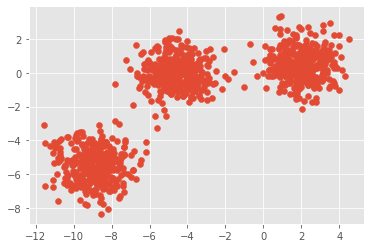

In [ ]:
%matplotlib inline
# la ligne ci-haut permet d'afficher des graphiques dans le jupyter notebook sans utiliser la méthode show()

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1000
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

plt.style.use('ggplot')

# on affiche nos données. 
# Comme premier argument on doit fournir les valeur en abcisse et 
# comme deuxième argument les valeurs de l'ordonnée
plt.scatter(x=X[:, 0], y=X[:, 1]);

Contrairement à l'exemple de la dernière démonstration, il n'y a pas d'étiquettes (*labels*) pour chacun des points. Nous sommes dans un contexte non-supervisé. Nous pouvons à présent tester notre modèle avec un nombre de clusters k=3.

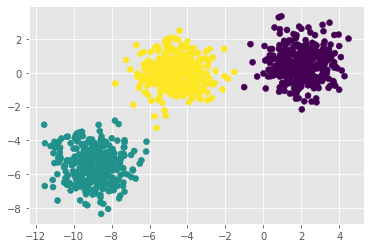

In [ ]:
centroids, labels = Kmeans(data=X, k=3, iter=10)
plt.scatter(X[:, 0], X[:, 1], c=labels);

Si votre implémentation est correcte, chacune des trois gaussiennes devrait être d'une couleur différente, indicant que l'algorithme a été capable de correctement partitionner les données.

Comme toute méthode, K-Moyennes a plusieurs a priori ("assumptions"). K-Moyennes suppose ainsi que 
- les groupes sont sphériques
- ont des tailles semblables
- ont un nombre équivalent d'exemples

Lorsque ces conditions ne sont pas respectées, il est possible que la méthode trouve un minimum local ou ne soit pas capable de bien partitionner les groupes.

Dans l'exemple précédent, les trois hypothèses sont vérifiées, parce qu'on a simulé trois gaussiennes isotropiques de même variance et avec un nombre de points similaire. Nous allons maintenant observer ce qu'il se passe lorsque certaines de ces trois conditions ne sont pas respectées.

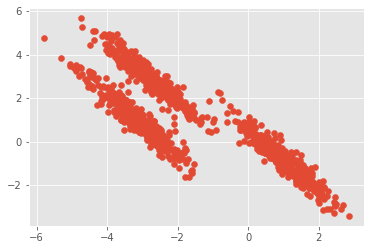

In [ ]:
# ici, nous appliquons une transformation à nos données
transformation = [[0.61, -0.64], [-0.41, 0.85]]
X_aniso = np.dot(X, transformation)
plt.scatter(x=X_aniso[:, 0], y=X_aniso[:, 1])

Ici, nous avons appliqué une même transformation à nos gaussiennes : elles sont toujours de même taille (variance) et générent le même nombre de points, mais elles ne sont plus isotropiques : leur forme n'est pas sphérique. La première hypothèse n'est donc pas vérifiée. Voyons comment cela impacte les performances de K-moyennes :

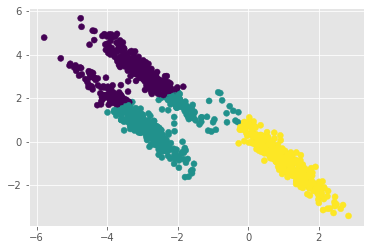

In [ ]:
centroids, labels = Kmeans(data=X_aniso, k=3, iter=10)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels);

Comme les différents groupes ne sont pas sphériques, k-moyenne échoue complétement. Ceci est du au fait que l'algorithme associe à chaque point le centroïde le plus proche, et n'est donc capable que de définir des groupes sphériques. Essayons une nouvelle transformation :

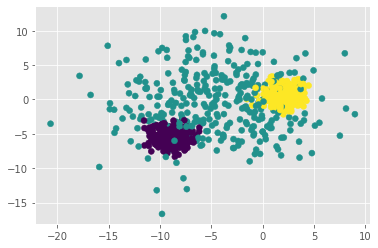

In [ ]:
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 5, 1], random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)

Ici, les couleurs utilisées ne sont pas les prédictions de K-moyennes mais les "bonnes réponses", autrement dit les couleurs des points correspondent à la gaussienne qui a généré le point, afin de mieux visualiser la distribution. Les gaussiennes sont toujours isotropiques (sphériques) et générent le même nombre de points, mais l'une d'entre elle a une variance nettement plus élevée que les autres. La deuxième hypothèse n'est donc pas vérifiée. Voyons à présent les performances de K-moyennes sur ces données :

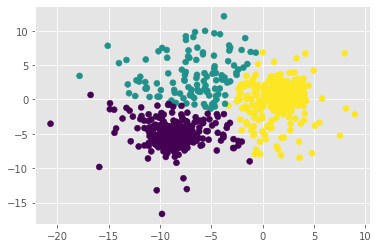

In [ ]:
centroids, labels = Kmeans(data=X_varied, k=3, iter=10)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=labels)

Encore une fois, K-moyennes échoue. Les points des gausiennes de faible variance (en bas et à droite) sont correctement tous assignés à un même groupe. Cependant, K-moyennes ne parvient pas à correctement assigner les points de la gaussienne à forte variance, car beaucoup d'entre eux sont proches des autres gaussiennes. Pourtant, étant donné la faible variance de ces deux autres gaussiennes, on devrait pouvoir déduire que ce n'est probablement pas elles qui ont généré ces points...

Finalement, regardons ce qu'il advient lorsque la troisième hypothèse n'est plus vérifiée, c'est à dire que les différentes gaussiennes ne générent plus un nombre équivalent de points

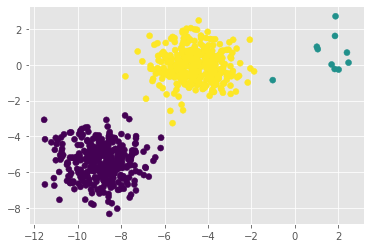

In [ ]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:500], X[y == 2][:10]))
centroids, labels = Kmeans(data=X_filtered, k=3, iter=10)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=labels)

Pour ce graphique, les performances de K-Moyennes sont plutôt satisfaisantes (Si vous voyez le groupe du milieu séparé en deux, c'est que l'algorithme est tombé dans un minima local ! ceci est cependant une occurence rare, vous pouvez donc relancer le code pour obtenir des prédictions plus raisonnables). Cependant, un point en particulier illustre la faiblesse de l'algorithme quand cette troisième hypothèse n'est pas vérifiée : le point situé entre les deux groupes du haut, et assigné au groupe en haut à droite. En effet, bien que ce point soit légérement plus proche du centre du groupe en haut à droite, étant donné que la gaussienne à sa gauche genère 50 fois plus de points que celle en haut à droite, il est plus probable que le point ai été généré par la gaussienne à sa gauche. D'une manière générale, K-Moyennes n'est pas capable de tenir compte du nombre d'exemples dans chaque groupe (ce qui serait modélisé par les poids $\pi_i$ des gaussiennes dans un modèle probabiliste comme GMM).

Finalement, appliquons k-Moyennes aux données originales, mais avec un $k$ ne correspondant pas au nombre de gaussiennes utilisées par `make_blob`.

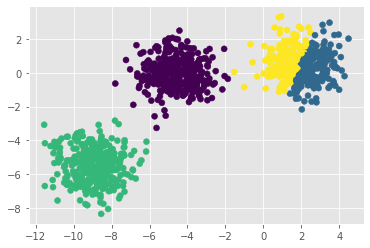

In [ ]:
centroids, labels = Kmeans(data=X, k=4, iter=10)
plt.scatter(X[:, 0], X[:, 1], c=labels)

Le résultat est plutôt prévisible: puisque l'on a plus de centroïdes (4) qu'il n'y a de gaussiennes (3), au moins une gaussienne va être divisée entre deux centroïdes. Vous pouvez faire des tests avec différentes valeurs de $k$ dans la cellule de code précédente, et observer le comportement de K-moyennes quand $k$ est plus élevé ou plus faible que le nombre réel de groupes.

Le choix d'un $k$ approprié est donc crucial pour les performances des K-moyennes.

## 8.3 Comment déterminer l'hyperparamètre $k$ ?

Jusqu'à maintenant nous avons utilisé des données seulement en deux dimensions. Il était très facile de proposer un nombre de groupe ($k$) pertinent pour k-Moyennes. Cependant, en pratique, la plupart des jeux de données ont un grand nombre de dimensions et il ne sera pas possible de déterminer visuellement le $k$ approprié. Alors comment faire?

Il existe plusieurs mesures permettant d'évaluer la cohésion intra-groupe et la séparation inter-groupe. Par exemple, le score silhouette (<https://en.wikipedia.org/wiki/Silhouette_(clustering)>) est un score associé à chaque point qui a une valeur entre -1 et 1. Pour évaluer le partitionnement, nous utiliserons la moyenne du score silhouette pour l'ensemble de nos données. Une valeur élevée signifie que le partitionnement est adéquat, inversement une valeur basse signifie que le $k$ choisi est inadéquat.

Pour un point $i$, son score silhouette $s$ est donné par:
$$ s(i) = \frac{b(i) - a(i)}{\max{\{a(i), b(i)}\}} $$
où $a(i)$ est la distance moyenne entre le point $i$ et l'ensemble des points faisant partie du même groupe, $b(i)$  est la distance moyenne entre le point $i$ et l'ensemble de tous les points ne faisant pas partie du même groupe. En général, un point bien assigné aura un $a(i)$ peu élevé par rapport à $b(i)$.

Pour déterminer le $k$ approprié, nous appliquerons la méthode k-Moyennes avec différents $k$ et nous calculerons le score silhouette correspondant pour chacun. Nous choisirons le $k$ associé au plus haut score silhouette. Nous utiliserons sklearn pour l'implémentation du score silhouette.

In [ ]:
from sklearn.metrics import silhouette_score

scores = []
k_range = range(2,15)
for k in k_range:
    centroids, labels = Kmeans(data=X, k=k, iter=100)
    scores.append(silhouette_score(X, labels))

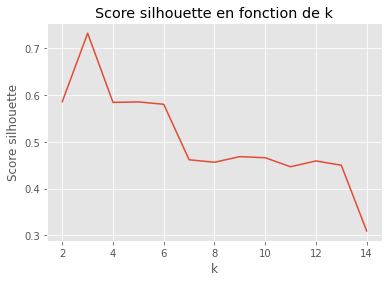

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Score silhouette')
plt.title('Score silhouette en fonction de k');

Pour chaque point du graphique, nous avons appliqué k-Moyennes avec un $k$ différent. Pour chacun des partitionnements, le score silhouette moyen a été calculé. Comme attendu, le $k$ ayant un score silhouette le plus élevé est 3, soit le nombre de gaussiennes provenant de `make_blob`. Avec ces données, le résultat est évident. Cependant, avec des données "naturelles", il est souvent plus ardu de déterminer le $k$ adéquat. Essayons la même méthode avec un nouveau jeu de données "mystère"...

In [ ]:
!wget -nc https://raw.githubusercontent.com/Cours-EDUlib/DIRO-SD1FR/master/donnees/silhouette.csv
X = np.loadtxt('silhouette.csv')

scores = []
k_range = range(5,20)
for k in k_range:
    centroids, labels = Kmeans(data=X, k=k, iter=100)
    scores.append(silhouette_score(X, labels))
    
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Score silhouette')
plt.title('Score silhouette en fonction de k');

OSError: ignored

Quel est la bonne valeur de $k$? Est-ce 18 où le maximum est atteint? Ou bien est-ce 10 qui a une valeur semblable à 18, mais qui a nombre de groupe inférieur? Il n'y a pas de réponse définitive. Cependant, le jeu de données mystère était en fait MNIST (les images de chiffres de 0 à 9 écrits à la main) ayant subi une réduction de dimensionnalité. Ce qui nous laisse croire que 10 est la bonne réponse (car il y a précisément 10 classes dans MNIST). Cependant, comme certains chiffres ont des graphies différentes (ex. le chiffre 7), il est possible que notre méthode de partitionnement prenne en compte ces graphies et les considère comme des groupes.

Voici le partitionnement obtenu:

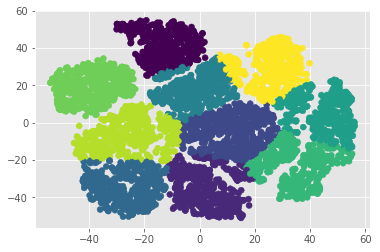

In [ ]:
centroids, labels = Kmeans(data=X, k=10, iter=100)
plt.scatter(X[:,0], X[:,1], c=labels);

En général, il faut être prudent avec cette méthode pour trouver le $k$. Par exemple, si $k = |D|$ (où $D$ est l'ensemble des données), on obtiendra alors un score très élevé, cependant les groupes découverts ne seront pas du tout pertinents... Chaque donnée aura son propre groupe!

Il existe naturellement d'autres manières de déterminer le $k$ adéquat. Par exemple, certaines méthodes pénalisent pour des valeurs de $k$ trop élevées. Si le sujet vous intéresse, je vous invite à consulter : https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set

## 8.4 k-Moyennes dans un espace non-euclidien

Supposons que nous avons des données dans un espace non-euclidien pour lequel nous avons tout de même une notion de  distance. Dans ce cas, il peut être pertinent d'utiliser une variante de la méthode k-Moyennes nommé k-Médoïde. Au lieu de trouver un centroïde pour représenter chacun des groupes, un exemple sera utilisé pour représenter chacun des groupes.

Afin d'illustrer k-Médoïde, prenons un exemple - un peu artificiel - constitué d'un petit jeu de données de mots. Supposons que ces mots sont écrits par des utilisateurs et permettent de déterminer la langue de l'utilisateur. Cependant, les utilisateurs font beaucoup d'erreurs de frappe. Il n'est donc pas possible de simplement utiliser un dictionnaire (ex. bonjour => français, hello => anglais). Dans cette exemple, un centroïde (i.e., la moyenne du groupe) n'a pas de sens. En effet, quel est le point milieu entre "bonjour" et "hello"? La question est absurde...

In [ ]:
words = ['bonjour', 'bonkour', 'bonjoru', 'bonjjour', 'bionjour', 'hello', 'helo', 'hrllo', 'ello', 'yello',
         'helllo','konnichiwa', 'konichiwa', 'konnchiwa', 'konnichioua', 'connichiwa']

Mais comment évaluer la similarité de deux mots? Est-ce que "hello" est plus proche de "pomme" que de "pelle"? Une distance intéressante est la distance de Levenshtein (https://fr.wikipedia.org/wiki/Distance_de_Levenshtein), qui est aussi nommée distance d'édition. Cette distance entre deux chaînes de caractères est égale au nombre minimal de suppression, ajout et remplacement nécessaire pour que les deux chaînes soient la même. Par exemple, entre les mots "pommes" et "assomme", il y a une distance de Levenshtein de 4. En effet, pour transformer "assomme" en "pommes" il faut tout d'abord supprimer les deux caractères "as" (2 modifications), remplacer le "s" pour un "p" (1), puis ajouter un "s" (1). Le tout pour un total de 4 modifications.

Ici, nous utiliserons un module python permettant de calculer la distance de Levenshtein. Pour vérifier notre exemple:

In [ ]:
!pip install python-Levenshtein
import Levenshtein
Levenshtein.distance('pommes', 'assomme')

4

> **Note:** Si vous choisissez de travailler localement, il est fort probable que le module Levenshtein ne soit pas installé sur votre ordinateur. Si c'est le cas, vous pouvez utiliser la commande `pip install python-Levenshtein` dans votre terminal.

Maintenant que nous avons une distance pour comparer les mots, nous pourrons appliquer la méthode k-Médoïde. Contrairement à k-Moyennes, l'implémentation de k-Médoïde nécessite qu'on lui fournisse la matrice de distance de nos données. À chaque position $(i,j)$ de cette matrice correspond la distance entre l'exemple $i$ et l'exemple $j$.

In [ ]:
D = np.zeros((len(words), len(words)))
for i in range(len(words)):
    for j in range(len(words)):
        D[i,j] = Levenshtein.distance(words[i], words[j])

> **Note:** Malheureusement, il n'y a pas d'implémentation de k-Médoïde dans scikit-learn. Nous utilisons donc l'implémentation de la librairie pyclustering.

In [ ]:
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = [0,1,2]

# ici, nous donnons directement notre matrice de distance
# il faut spécifier data_type='distance_matrix'
kmedoids_instance = kmedoids(D, initial_medoids, data_type='distance_matrix')

kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

     |████████████████████████████████| 2.6MB 5.1MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=831bca5060da607f94e2f6a6380db9bd1d9e33679e3ac83f6689c721a589be4b
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [ ]:
print('Medoides:')
for i in medoids:
    print(words[i])
    
print('\nAssignation aux groupes:')
for label, cluster in enumerate(clusters):
    for i in cluster:
        print('label {0}:　{1}'.format(label, words[i]))

Medoides:
bonjour
hello
konichiwa

Assignation aux groupes:
label 0:　bonjour
label 0:　bonkour
label 0:　bonjoru
label 0:　bonjjour
label 0:　bionjour
label 1:　hello
label 1:　helo
label 1:　hrllo
label 1:　ello
label 1:　yello
label 1:　helllo
label 2:　konnichiwa
label 2:　konichiwa
label 2:　konnchiwa
label 2:　konnichioua
label 2:　connichiwa


On peut tout d'abord constater que la méthode nous retourne les valeurs des médoïdes. Ces valeurs correspondent justement aux mots ayant une bonne orthographie! Dans un second temps, on peut voir que les différents groupes trouvés correspondent bien à notre intuition.

## 8.5 Comparaison de k-Moyennes à d'autres modèles de partitionnement

Nous avons vu plusieurs exemples où la méthode k-Moyennes échoue. Habituellement, cela survient lorsque les données ne respectent pas nos *a priori*. Dans cette section, nous verrons comment le modèle de mélange de Gaussiennes et DBSCAN performent sur les mêmes données. Et, finalement, nous verrons les limites de ces deux modèles.

### 8.5.1 Modèle de mélange de Gaussiennes 

Nous avons vu que k-Moyennes peut avoir de sérieux problèmes lorsque les données ne sont pas réparties en sphère avec une variance égale. En fait, ce modèle peut être vu comme un cas particulier du modèle de mélange de Gaussiennes (GMM) où les gaussiennes sont isotropiques, de même tailles et avec le même nombre de points. En général, le GMM peut partitionner convenablement des données provenant de gaussiennes non-isotropiques, de tailles variables et ayant un nombre d'exemple différents (autrement dit, GMM s'affranchis des a priori de K-Moyennes, mais continue de supposer que chaque groupe corresponds à une distribution gaussienne !)

Le fonctionnement de GMM est similaire à K-moyennes, mais en légérement plus sophistiqué : durant la première étape (espérance), nous allons assigner les points à la gaussienne qui a la plus haute probabilité d'avoir généré ce point. Cela ne dépends plus de la distance seule, mais aussi de la direction et de la matrice de covariance de la gaussienne et de son poids (la proportion d'exemples qu'elle génère). Durant la deuxième étape (maximisation), pour chaque gaussienne, on va calculer le centre et la matrice de covariance qui maximisent la probabilité de générer les points qui lui sont associés.

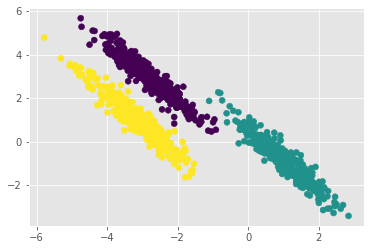

In [ ]:
from sklearn.mixture import GaussianMixture

X, _ = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)
transformation = [[0.61, -0.64], [-0.41, 0.85]]
X_aniso = np.dot(X, transformation)
 
estimator = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=0)
estimator.fit(X_aniso)
y_pred = estimator.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred);

Comme attendu, GMM est capable de correctement partitionner des données suivants des gaussiennes non-isotropiques, là où K-Moyennes n'en était pas capable.

Maintenant, utilisons un GMM sur des données qui ne proviennent pas d'une distribution gaussienne. En l'occurence, nous utiliserons `make_moons`.

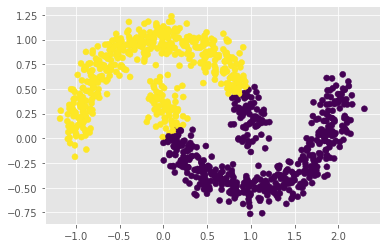

In [ ]:
from sklearn.datasets import make_moons

n_samples = 1000
random_state = 170
X_moon, _ = make_moons(n_samples=n_samples, random_state=random_state, noise=0.1)

estimator = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, random_state=0)
estimator.fit(X_moon)
y_pred = estimator.predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred);

On observe là les limites de GMM : l'hypothèse selon laquelle les groupes suivent des distributions gaussiennes est très importante. D'autres méthodes permettent de s'affranchir de cette hypothèse. Par exemple, le "spectral clustering" est capable de parfaitement partitionner l'exemple précédent (cf. https://fr.wikipedia.org/wiki/Partitionnement_spectral)

### 8.5.2 DBSCAN

Contrairement à k-Moyennes et au GMM, il n'est pas nécessaire de spécifier le nombre de groupe attendu pour DBSCAN. De plus, DBSCAN n'assume pas de forme particulière des groupes.

DBSCAN a tout de même deux hyperparamètres qui peuvent grandement influencer le résultat obtenu: le rayon de voisinage et la densité critique.

Pour tester par vous-même: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

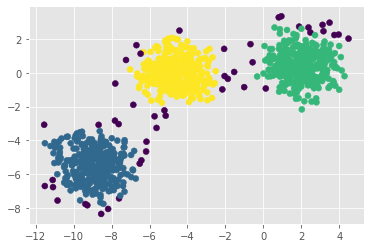

In [ ]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

Sur ces données, le résultat est semblable à k-Moyennes. Cependant, DBSCAN a -en plus- identifié des points aberrants. 

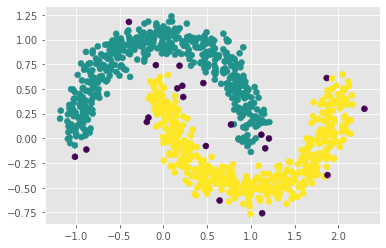

In [ ]:
y_pred = DBSCAN(eps=0.1, min_samples=5).fit_predict(X_moon)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred);

Comme DBSCAN n'a pas d'*a priori* concernant la forme de la distribution des données, le jeu de données `make_moons` ne constitue pas un problème. Appliquons maintenant DBSCAN aux mêmes données où k-Moyennes échouait:

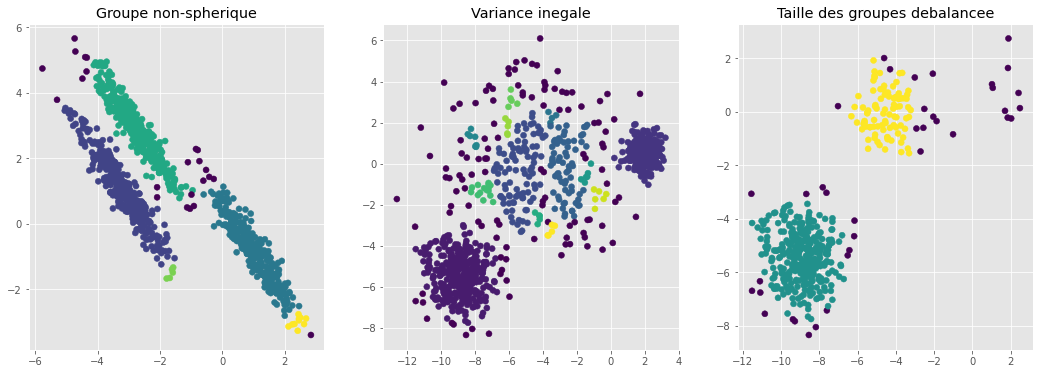

In [ ]:
plt.figure(figsize=(18, 6))

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=0.3, min_samples=5).fit_predict(X_aniso)

plt.subplot(131)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Groupe non-spherique")

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = DBSCAN().fit_predict(X_varied)

plt.subplot(132)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Variance inegale")

X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = DBSCAN().fit_predict(X_filtered)

plt.subplot(133)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Taille des groupes debalancee");

Ici, nous avons utilisé `subplot` qui peut être très pratique pour afficher plusieurs graphiques en même temps.

Pour terminer, appliquons DBSCAN aux gaussiennes non-isotropiques, mais avec des hyperparamètres différents...

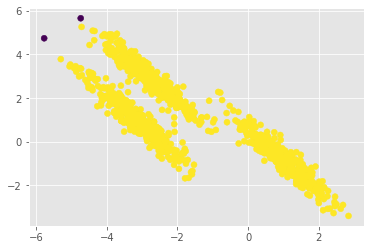

In [ ]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred);

Ici, le rayon de voisinage (`eps` dans le code) est trop grand et toutes les données sont groupées dans un seul grand groupe.

DBSCAN est un algorithme très versatile mais le choix de ses hyperparamètres n'est pas toujours évident et il a parfois du mal à distinguer les valeurs absurdes de valeurs normales légérement plus éloignées du reste du groupe.

# Exercices


1. Trouvez des valeurs de `epsilon` et `min_samples` pour l'algorithme DBSCAN qui retourne un "bon partitionnment" des données `X` ici bas (données tirées d'un exemple de scikit-learn), c'est-à-dire 4 clusters. Vous pouvez tester par essai-erreur ou bien utilisez la méthode `OPTICS`...

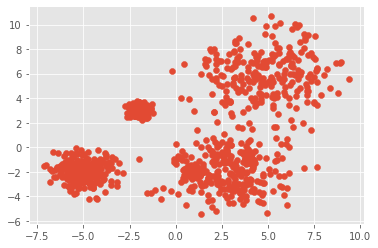

In [ ]:
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))
plt.scatter(X[:,0], X[:,1]);

In [ ]:
# Votre réponse ici

2. Déterminez le nombre de regroupement dans un vrai jeu de données à partir de l'algorithme k-moyennes et du score silhouette. Nous allons utiliser les données suivantes: [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Ce jeu de données contient des résultats de biopsie de tumeurs du sein.

In [ ]:
import pandas as pd

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
df = pd.read_csv('breast-cancer-wisconsin.data', sep=',', header=None)
df = df.drop(columns = [0, 6])

--2021-02-26 16:39:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data.2’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.06s   

2021-02-26 16:39:08 (302 KB/s) - ‘breast-cancer-wisconsin.data.2’ saved [19889/19889]



In [ ]:
X = df.values
print(X.shape)
df.head()

(699, 9)


,1,2,3,4,5,7,8,9,10
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [ ]:
# Votre réponse ici